## **Lab 06**

**K means clustering**

Features:
* Data Scaling: Normalizes the input data using StandardScaler.
* K-Means Clustering: Implements the K-Means algorithm with custom Euclidean distance calculation.
* Visualizations: Plots data points, centroids, and clustering assignments at each iteration to show the clustering process.

**Key Functions:**

* euclidean_distance(a, b): Calculates Euclidean distance between two points.

* kmeans(X, k, max_iterations=100):
* Initializes centroids.
* Assigns data points to the closest centroid.
* Updates centroids until convergence.
* visualize_step(X, centroids, labels=None, title="Clustering Step"): Visualizes data points, centroids, and cluster assignments at each step.

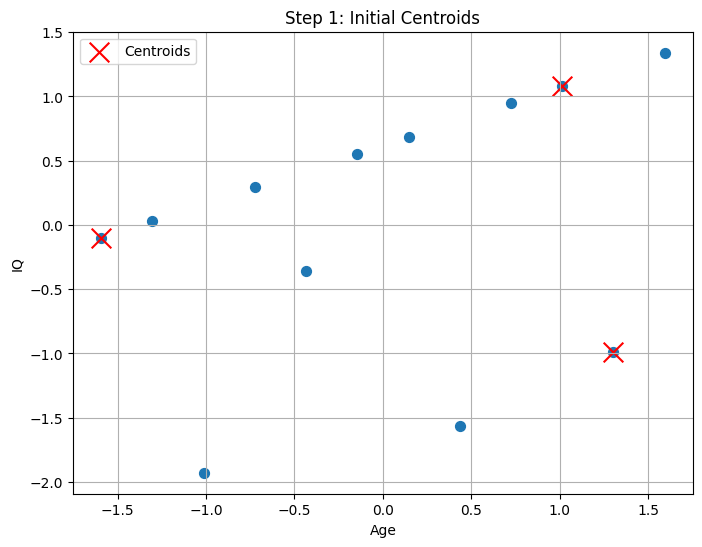

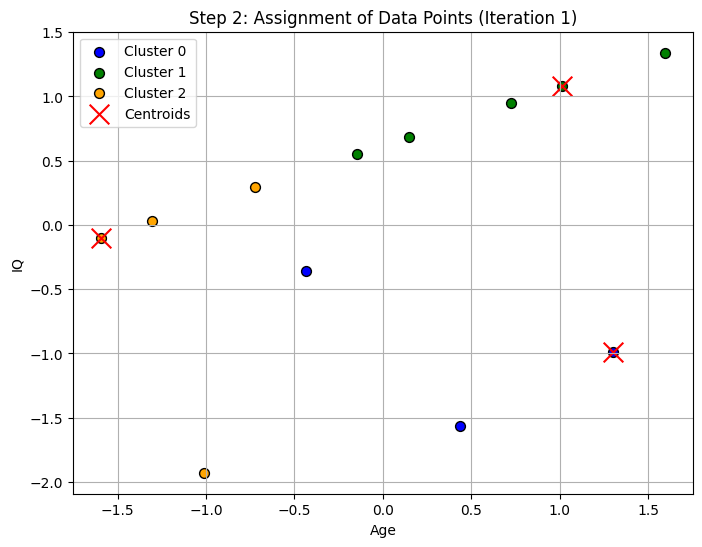

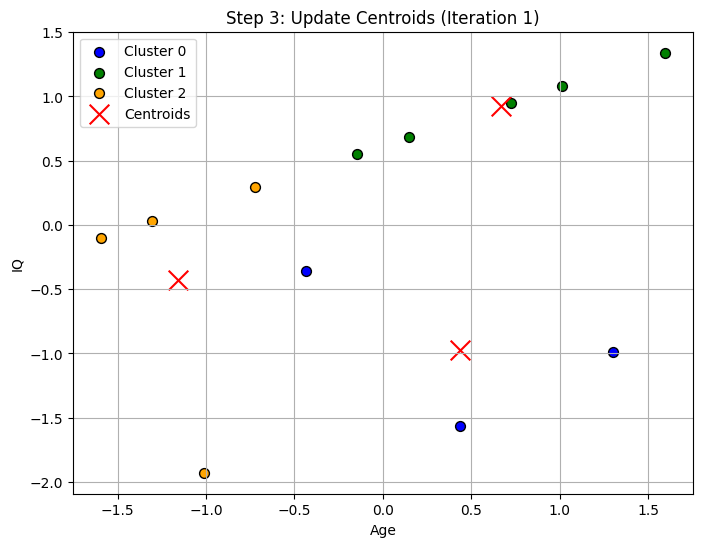

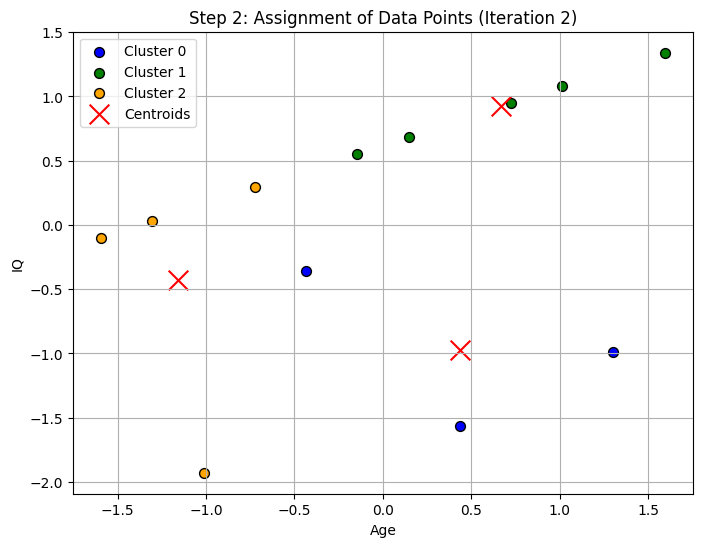

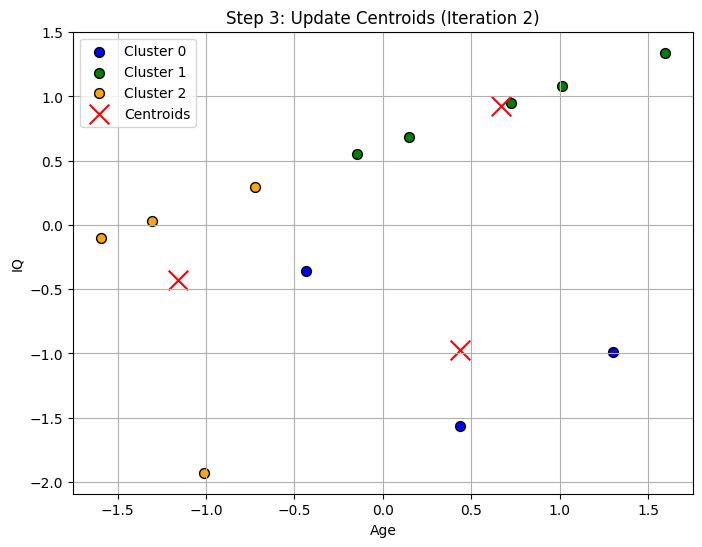

In [1]:
# Import necessary libraries
import numpy as np  # For numerical computations
import matplotlib.pyplot as plt  # For visualizations
from sklearn.preprocessing import StandardScaler  # For feature scaling


data = np.array([
    [18, 90, 4.0],
    [19, 95, 2.5],
    [20, 20, 3.0],
    [21, 105, 3.5],
    [22, 80, 1.5],
    [23, 115, 3.2],
    [24, 120, 3.8],
    [25, 34, 2.5],
    [26, 130, 3.4],
    [27, 135, 3.1],
    [28, 56, 2.8],
    [29, 145, 2.6]
])


scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to implement k-Means Clustering with step-by-step visualizations
def kmeans(X, k, max_iterations=100):
    np.random.seed(42)  # Seed for reproducibility
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]  # Step 1: Initialize centroids
    visualize_step(X, centroids, None, title="Step 1: Initial Centroids")  # Visualize initial centroids

    for iteration in range(max_iterations):
        # Step 2: Assign each data point to the closest centroid
        labels = np.array([np.argmin([euclidean_distance(x, centroid) for centroid in centroids]) for x in X])
        visualize_step(X, centroids, labels, title=f"Step 2: Assignment of Data Points (Iteration {iteration + 1})")

        # Step 3: Calculate new centroids based on mean of assigned points
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        visualize_step(X, new_centroids, labels, title=f"Step 3: Update Centroids (Iteration {iteration + 1})")

        # If centroids do not change, break the loop (algorithm converged)
        if np.all(centroids == new_centroids):
            break

        # Update centroids for the next iteration
        centroids = new_centroids

    return np.array(centroids), np.array(labels)  # Ensure they are NumPy arrays

# Function to visualize clustering process at each step
def visualize_step(X, centroids, labels=None, title="Clustering Step"):
    plt.figure(figsize=(8, 6))

    # Create a dictionary for class names
    colors = ['blue', 'green', 'orange']

    # Plot data points with labels if they exist
    if labels is not None:
        for class_label in np.unique(labels):
            plt.scatter(X[labels == class_label, 0], X[labels == class_label, 1],
                        label=f'Cluster {class_label}', s=50, edgecolor='k', color=colors[class_label % len(colors)])
    else:
        plt.scatter(X[:, 0], X[:, 1], s=50)

    # Plot centroids
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, label='Centroids')

    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('IQ')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Set the number of clusters (k)
k = 3  # You can choose the number of clusters based on your preference

# Run the k-Means algorithm with visualizations for each step
centroids, labels = kmeans(X_scaled, k)
